<a href="https://colab.research.google.com/github/Juliadambros/Aplicacoes-Inteligencia-Artificial/blob/main/Aplica%C3%A7%C3%A3o_do_Algoritmo_da_Col%C3%B4nia_de_Formigas_para_o_problema_do_Caxeiro_Viajante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-481311529.py:30: RuntimeWarning: divide by zero encountered in divide
  visibility = np.where(dist > 0, 1 / dist, 0)


Iteração 1/40 — Melhor até agora: 278.00
Iteração 2/40 — Melhor até agora: 278.00
Iteração 3/40 — Melhor até agora: 278.00
Iteração 4/40 — Melhor até agora: 266.00
Iteração 5/40 — Melhor até agora: 242.00
Iteração 6/40 — Melhor até agora: 242.00
Iteração 7/40 — Melhor até agora: 242.00
Iteração 8/40 — Melhor até agora: 234.00
Iteração 9/40 — Melhor até agora: 234.00
Iteração 10/40 — Melhor até agora: 234.00
Iteração 11/40 — Melhor até agora: 234.00
Iteração 12/40 — Melhor até agora: 234.00
Iteração 13/40 — Melhor até agora: 234.00
Iteração 14/40 — Melhor até agora: 234.00
Iteração 15/40 — Melhor até agora: 229.00
Iteração 16/40 — Melhor até agora: 229.00
Iteração 17/40 — Melhor até agora: 229.00
Iteração 18/40 — Melhor até agora: 229.00
Iteração 19/40 — Melhor até agora: 229.00
Iteração 20/40 — Melhor até agora: 229.00
Iteração 21/40 — Melhor até agora: 229.00
Iteração 22/40 — Melhor até agora: 229.00
Iteração 23/40 — Melhor até agora: 229.00
Iteração 24/40 — Melhor até agora: 229.00
I

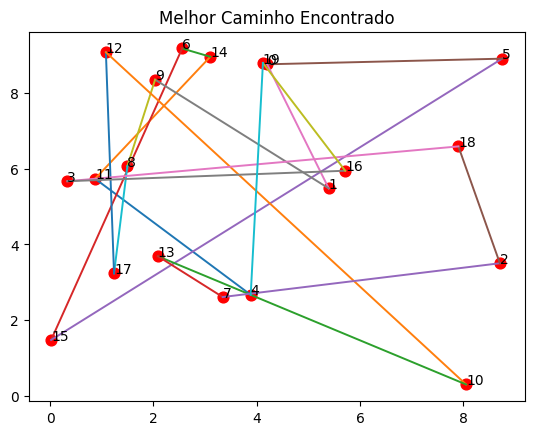

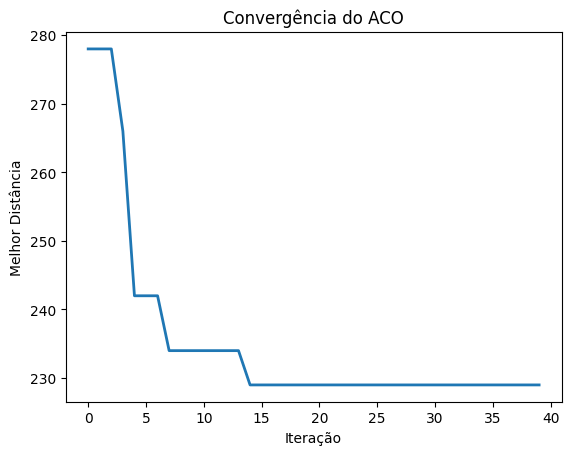

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Graph:
    def __init__(self, distances):
        self.distances = distances
        self.num_nodes = len(distances)

        # pheromones start small (better convergence)
        self.pheromones = np.full_like(distances, 0.1, dtype=float)

class Ant:
    def __init__(self, graph, alpha=1.0, beta=3.0):
        self.graph = graph
        self.alpha = alpha      # weight of pheromones
        self.beta = beta        # weight of distance (visibility)

        self.current_node = np.random.randint(graph.num_nodes)

        self.path = [self.current_node]
        self.total_distance = 0

        self.unvisited = set(range(graph.num_nodes)) - {self.current_node}

    def select_next_node(self):
        pher = self.graph.pheromones[self.current_node]
        dist = self.graph.distances[self.current_node]

        # visibility = 1 / distance
        visibility = np.where(dist > 0, 1 / dist, 0)

        scores = np.zeros(self.graph.num_nodes)

        for node in self.unvisited:
            scores[node] = (pher[node] ** self.alpha) * (visibility[node] ** self.beta)

        probabilities = scores / scores.sum()
        return np.random.choice(range(self.graph.num_nodes), p=probabilities)

    def move(self):
        nxt = self.select_next_node()
        self.path.append(nxt)
        self.total_distance += self.graph.distances[self.current_node][nxt]

        self.current_node = nxt
        self.unvisited.remove(nxt)

    def complete_path(self):
        while self.unvisited:
            self.move()

        # return to start
        start = self.path[0]
        self.total_distance += self.graph.distances[self.current_node][start]
        self.path.append(start)

class ACO:
    def __init__(self, graph, n_ants, iterations, decay=0.5, alpha=1.0, beta=3.0, q=1.0):
        self.graph = graph
        self.n_ants = n_ants
        self.iterations = iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta
        self.q = q

        self.best_history = []

    def run(self):
        best_path = None
        best_dist = np.inf

        for it in range(self.iterations):

            ants = [Ant(self.graph, self.alpha, self.beta) for _ in range(self.n_ants)]

            for ant in ants:
                ant.complete_path()

                if ant.total_distance < best_dist:
                    best_dist = ant.total_distance
                    best_path = ant.path

            self.update_pheromones(ants)
            self.best_history.append(best_dist)

            print(f"Iteração {it+1}/{self.iterations} — Melhor até agora: {best_dist:.2f}")

        return best_path, best_dist

    def update_pheromones(self, ants):
        # evaporation
        self.graph.pheromones *= (1 - self.decay)

        # deposit
        for ant in ants:
            contrib = self.q / ant.total_distance
            for i in range(len(ant.path) - 1):
                a = ant.path[i]
                b = ant.path[i+1]
                self.graph.pheromones[a][b] += contrib
                self.graph.pheromones[b][a] += contrib  # symmetric TSP


num_nodes = 20
distances = np.random.randint(5, 80, size=(num_nodes, num_nodes))
np.fill_diagonal(distances, 0)

graph = Graph(distances)
aco = ACO(
    graph,
    n_ants=20, #número de formigas
    iterations=40, #Se o valor for alto, o algoritmo converge sempre pro mesmo resultado. Se for baixo, a aleatoriedade domina
    decay=0.5, #evaporação do feromônio. ecay baixo (0.1) → feromônio dura → converge sempre igual, decay alto (0.5–0.8) → mais exploração, resultados diferentes
    alpha=1.0, #influência do feromônio. alpha alto (1.0 a 2.0) → fortemente guiado pelo feromônio, alpha baixo (0.1) → quase aleatório
    beta=3.0, #peso da heurística — distância. beta alto (3 a 5) → algoritmo usa mais a distância → solução mais estável, beta baixo (1 a 1.5) → mais aleatório
    q=1.0 #quantidade de feromônio deixado. Valores maiores → rotas boas dominam mais rápido, Valores menores → mais exploração
)

best_path, best_distance = aco.run()

path_str = " → ".join(str(n) for n in best_path)

print("      RESULTADO FINAL")
print("==============================")
print(f"Melhor sequência encontrada:\n{path_str}")
print(f"\nDistância total: {best_distance:.2f}")
print("==============================\n")


def plot_final(distances, path):
    coords = np.random.rand(len(distances), 2) * 10

    plt.scatter(coords[:, 0], coords[:, 1], s=60, c="red")

    for i, (x, y) in enumerate(coords):
        plt.text(x, y, str(i))

    for i in range(len(path) - 1):
        a, b = path[i], path[i + 1]
        plt.plot([coords[a, 0], coords[b, 0]],
                 [coords[a, 1], coords[b, 1]],
                 linewidth=1.4)

    plt.title("Melhor Caminho Encontrado")
    plt.show()


def plot_progress(history):
    plt.plot(history, linewidth=2)
    plt.xlabel("Iteração")
    plt.ylabel("Melhor Distância")
    plt.title("Convergência do ACO")
    plt.show()


plot_final(distances, best_path)
plot_progress(aco.best_history)
